In [1]:
import numpy as np

class Perceptron:
    """Perceptron classifier

    === Public Attributes ===
    learning_rate:
        A hyper-parameter that controls how much we are adjusting the weights
        of the network with respect the loss gradient.
    num_iterations:
        Number of iterations of the optimization loop.
    weight:
        This determines the strength of the connection of the neurons.
    bias:
        Bias neurons allow the output of an activation funcrtion to be shifted.
    """
    learning_rate: float
    num_iterations: int
    weight: np.array
    bias: np.array

    def __init__(self, learning_rate, num_iterations) -> None:
        """Initialize a new Perceptron with the provided
        <learning_rate> and <num_iterations>
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = np.array([0])
        self.bias = np.array([0])

    def net_input(self, x: np.array) -> np.array:
        """Calculate the input of the activation function

        :param x: input data, of shape (n_x, n_samples)
        :return: the input of the activation function
        """
        return np.dot(self.weight.T, x) + self.bias

    def predict(self, x: np.array) -> np.array:
        """Activation function.  Calculate the output prediction

        :param x: input data, of shape (n_x, n_samples)
        :return: the output prediction
        """
        return np.where(self.net_input(x) > 0, 1, -1)

    def fit(self, x: np.array, y: np.array) -> np.array:
        """Fit training data

        :param x: input data, of shape (n_x, n_samples)
        :param y: true label vector, of shape (1, n_samples)
        :return: the output prediction after training data
        """
        m = x.shape[1]
        y_pred = np.array
        self.weight = np.random.randn(x.shape[0], 1)*0.01
        self.bias = np.zeros((1, 1))

        for i in range(self.num_iterations):
            y_pred = self.predict(x)

            dw = (1/m)*np.dot(x, (y_pred-y).T)
            db = (1/m)*np.sum(y_pred-y)

            self.weight -= self.learning_rate*dw
            self.bias -= self.learning_rate*db

        return y_pred

In [2]:
from sklearn import datasets

# acquire Data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# select only "setosa" and "versicolor"
# extract only "sepal length" and "petal length"
X = np.delete(X, [1, 3], axis=1)
delete_target = np.where(y == 2)
y = np.delete(y, delete_target)
X = np.delete(X, delete_target, axis=0)
y = np.where(y == 0, -1, 1)

In [3]:
#use Pandas DataFrame to visualize the data.
import pandas as pd

pd.set_option('display.max_rows', 9)
pd.DataFrame({'sepal length (cm)': X[:, 0], 'petal length (cm)': X[:, 1], 
              'target (1: versicolor, -1: setosa)': y}, 
              index=np.arange(1, len(X)+1))

,sepal length (cm),petal length (cm),"target (1: versicolor, -1: setosa)"
1,5.1,1.4,-1
2,4.9,1.4,-1
3,4.7,1.3,-1
4,4.6,1.5,-1
...,...,...,...
97,5.7,4.2,1
98,6.2,4.3,1
99,5.1,3.0,1
100,5.7,4.1,1


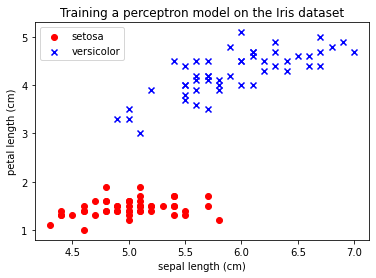

In [4]:
#use Matplotlib, a Python 2D plotting library, to show a graph of iris dataset.
import matplotlib.pyplot as plt

setosa = np.where(y == -1)
versicolor = np.where(y == 1)
plt.scatter(X[setosa, 0], X[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[versicolor, 0], X[versicolor, 1],
            color='blue', marker='x', label='versicolor')
plt.title('Training a perceptron model on the Iris dataset')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

In [5]:
# create a Perceptron object by setting the learning rate and number of iterations. 
# Then, train the perceptron model by calling fit method with two arguments: input data and true label vector.
ppn = Perceptron(learning_rate=0.3, num_iterations=10)
y_pred = ppn.fit(X.T, y)

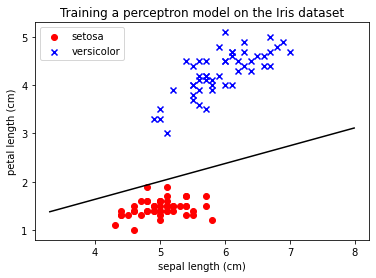

Accuracy: 100.0%


In [6]:
# The result can be visualized by plotting the decision boundary and data. Again, 
# use Matplotlib to show data with boundary line which was trained by the model.
x_ax = np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01)
w1 = ppn.weight[0]
w2 = ppn.weight[1]
b = ppn.bias[0]
plt.plot(x_ax, -w1*x_ax/w2 - b/w2, color='black')

setosa = np.where(y == -1)
versicolor = np.where(y == 1)
plt.scatter(X[setosa, 0], X[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[versicolor, 0], X[versicolor, 1],
            color='blue', marker='x', label='versicolor')
plt.title('Training a perceptron model on the Iris dataset')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

print('Accuracy: ' + str(np.mean(y_pred == y) * 100) + '%')